In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import glob
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import Image as IPyImage, display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="kRTto3E07NvJf8T6oo1y")
project = rf.workspace("detectoreyesdisease").project("eyes_detect-van31")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eyes_detect-2 in yolov8:: 100%|██████████| 1487/1487 [00:00<00:00, 10120.22it/s]


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8m.pt" epochs=120 imgsz=640 batch=16

100% 49.7M/49.7M [00:01<00:00, 49.8MB/s]
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/eyes_detect-2/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

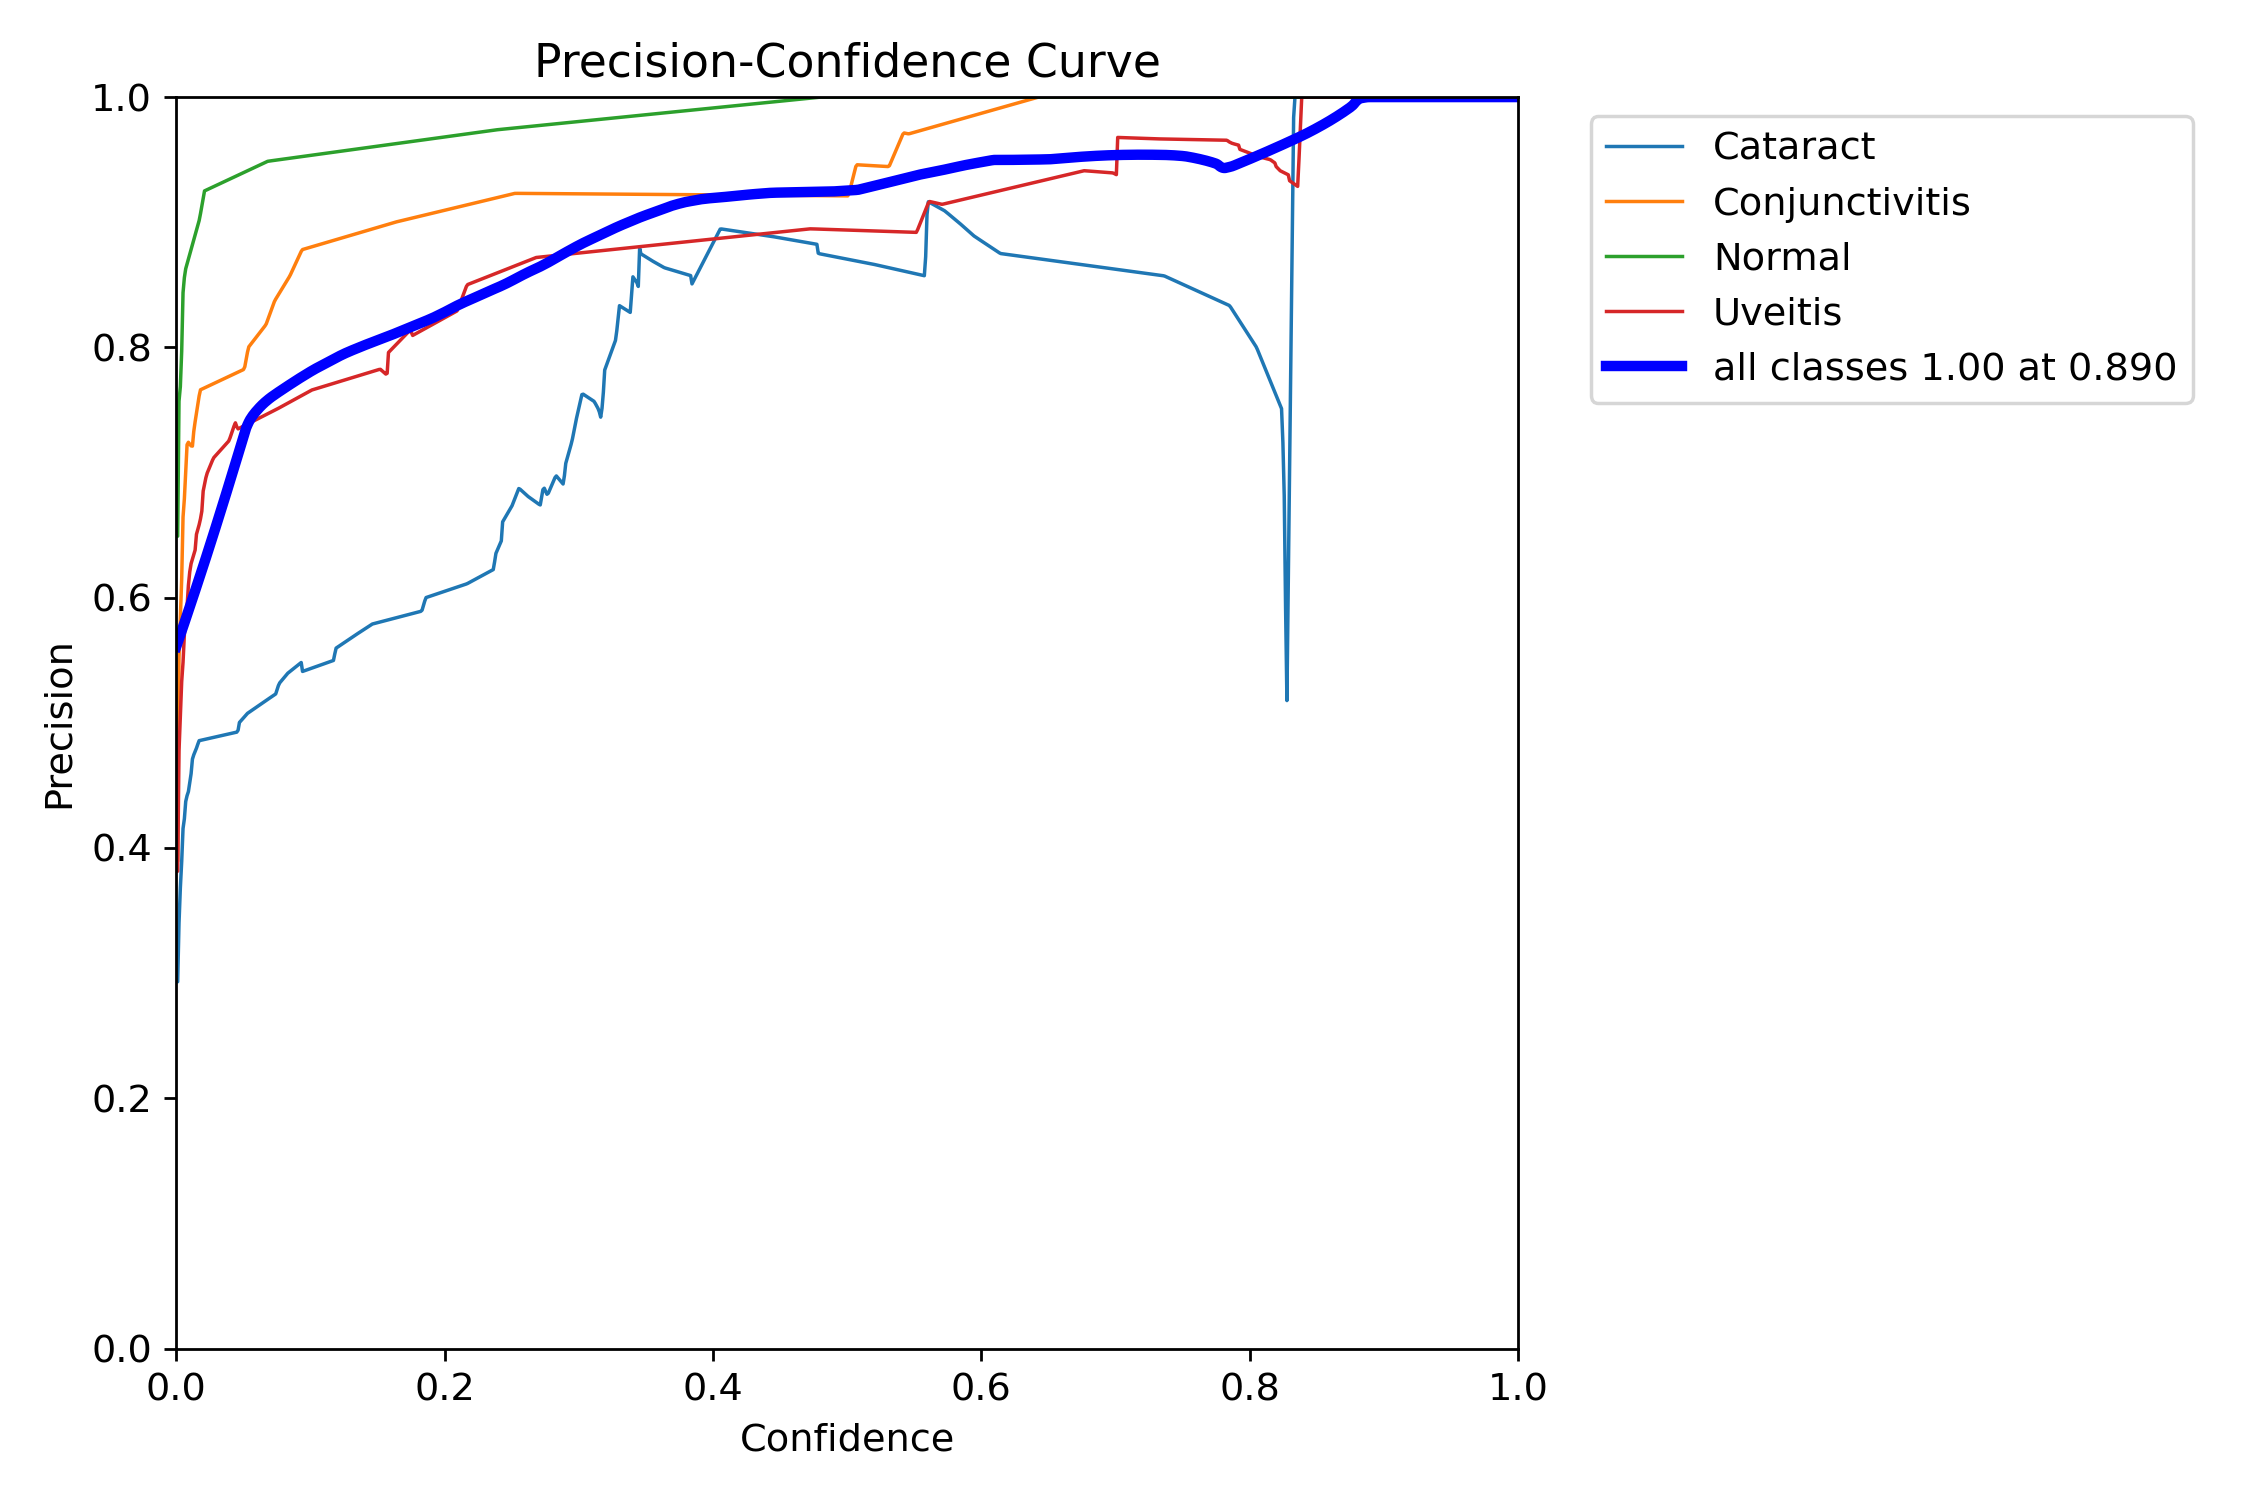

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)


In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)


In [ ]:
!zip -r tune_yolov8_120-epochs.zip /content/runs


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/F1_curve.png (deflated 9%)
  adding: content/runs/detect/train/results.csv (deflated 62%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 7%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 17%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 26%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 8%)
  adding: content/runs/detect/train/PR_curve.png (deflated 18%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 14%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 17%)
  adding: content/runs/detect/train/train_batch4181.jpg (defl

In [ ]:
from google.colab import files

files.download("/content/tune_yolov8_120-epochs.zip")

In [ ]:
model_path = '/content/runs/detect/train/weights/best.pt'
img_test = '/content/imgs'

In [ ]:
!yolo task=detect mode=predict model= {model_path} conf=0.25 source={img_test} save=True


In [ ]:
latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")